In [3]:
import os
import json
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.preprocessing import LabelBinarizer

In [4]:
base_dir = '/Users/dhiyanesh/Desktop/Study Material/sign-language-sokdr'
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')
annotations_path = os.path.join(train_dir, '_annotations.coco.json')

In [5]:
with open(annotations_path, 'r') as file:
    annotations = json.load(file)

annotations['annotations'][:5]  # Display the first few annotations

[{'id': 0,
  'image_id': 0,
  'category_id': 15,
  'bbox': [139, 355, 303.5, 285],
  'area': 86497.5,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 1,
  'image_id': 1,
  'category_id': 1,
  'bbox': [88, 181, 447, 341.5],
  'area': 152650.5,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 2,
  'image_id': 2,
  'category_id': 26,
  'bbox': [168, 360, 190, 133],
  'area': 25270,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 3,
  'image_id': 3,
  'category_id': 4,
  'bbox': [124, 128, 280, 390.5],
  'area': 109340,
  'segmentation': [],
  'iscrowd': 0},
 {'id': 4,
  'image_id': 4,
  'category_id': 3,
  'bbox': [57, 110, 562.5, 513.5],
  'area': 288843.75,
  'segmentation': [],
  'iscrowd': 0}]

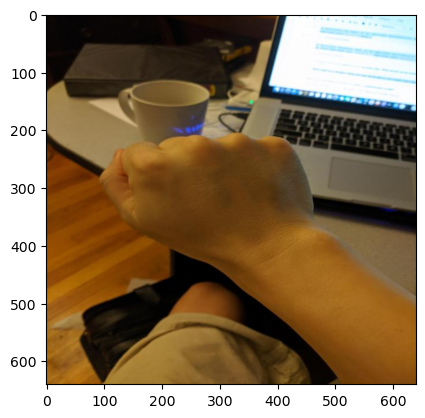

In [6]:
def load_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

# Example of visualizing an image with its annotations
example_image_path = os.path.join(train_dir, 'A0_jpg.rf.1db0823d430610d241b0945e5f7bf17f.jpg')
example_image = load_image(example_image_path)
plt.imshow(example_image)
plt.show()


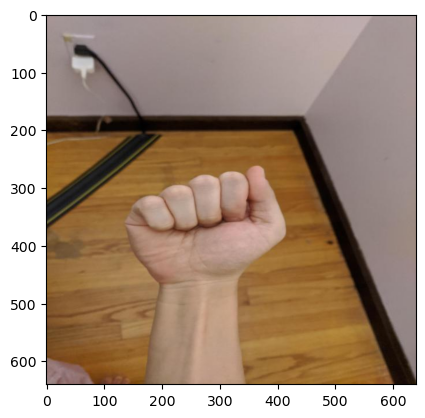

In [7]:
def load_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

# Example of visualizing an image with its annotations
example_image_path = os.path.join(train_dir, 'A13_jpg.rf.1e80afd2974fe22166bc08bd79f5f800.jpg')
example_image = load_image(example_image_path)
plt.imshow(example_image)
plt.show()


In [8]:
# Function to load images and labels from a directory
def load_images_and_labels(directory):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            label = filename[0].upper()  # Extract the first letter as label
            img_path = os.path.join(directory, filename)
            image = load_img(img_path, target_size=(64, 64))
            image = img_to_array(image) / 255.0  # Normalize the image
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

In [9]:
# Load data from train, valid, and test directories
X_train, y_train = load_images_and_labels(train_dir)
X_valid, y_valid = load_images_and_labels(valid_dir)
X_test, y_test = load_images_and_labels(test_dir)

# Encode labels to one-hot vectors
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_valid = label_binarizer.transform(y_valid)
y_test = label_binarizer.transform(y_test)

# Print dataset sizes
print(f'Training data size: {X_train.shape[0]}')
print(f'Validation data size: {X_valid.shape[0]}')
print(f'Test data size: {X_test.shape[0]}')


Training data size: 504
Validation data size: 144
Test data size: 72


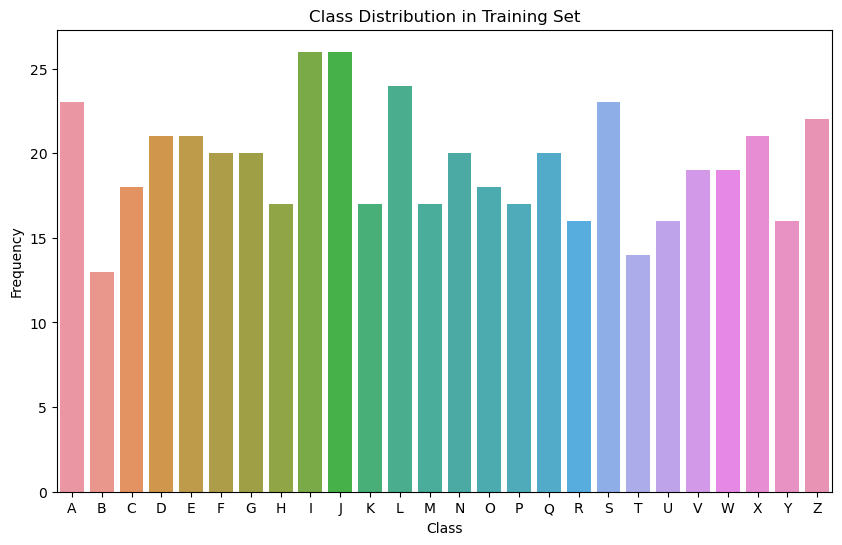

In [10]:
# Plot the distribution of classes
class_counts = np.sum(y_train, axis=0)
class_labels = label_binarizer.classes_

plt.figure(figsize=(10, 6))
sns.barplot(x=class_labels, y=class_counts)
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()


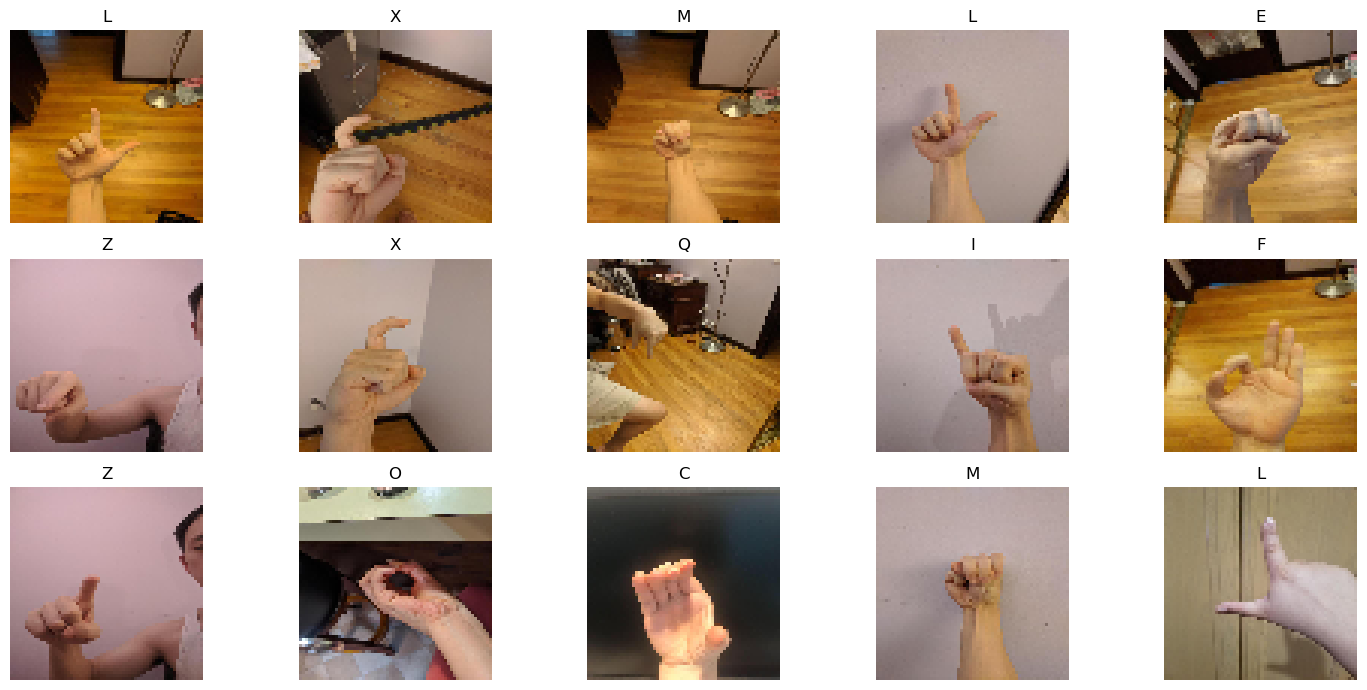

In [11]:
# Plot a few images from the training set with their labels
def plot_sample_images(images, labels, label_binarizer, num_rows=3, num_cols=5):
    plt.figure(figsize=(15, 7))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i])
        plt.title(label_binarizer.classes_[np.argmax(labels[i])])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_sample_images(X_train, y_train, label_binarizer)

In [12]:
# Summary statistics for the dataset
print("Image shape:", X_train.shape[1:])

# Mean and standard deviation of pixel values
mean_pixel_value = np.mean(X_train)
std_pixel_value = np.std(X_train)
print(f'Mean pixel value: {mean_pixel_value:.4f}')
print(f'Standard deviation of pixel value: {std_pixel_value:.4f}')

Image shape: (64, 64, 3)
Mean pixel value: 0.4603
Standard deviation of pixel value: 0.2341


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(label_binarizer.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=16,
    validation_data=(X_valid, y_valid)
)

Epoch 1/15
32/32 [==============================] - 6s 156ms/step - loss: 3.2727 - accuracy: 0.0298 - val_loss: 3.2539 - val_accuracy: 0.1101
Epoch 2/15
32/32 [==============================] - 5s 169ms/step - loss: 3.2475 - accuracy: 0.0635 - val_loss: 3.2207 - val_accuracy: 0.1218
Epoch 3/15
32/32 [==============================] - 5s 144ms/step - loss: 3.1801 - accuracy: 0.0853 - val_loss: 3.0355 - val_accuracy: 0.1429
Epoch 4/15
32/32 [==============================] - 5s 146ms/step - loss: 3.0304 - accuracy: 0.1429 - val_loss: 2.8291 - val_accuracy: 0.1827
Epoch 5/15
32/32 [==============================] - 6s 193ms/step - loss: 2.8525 - accuracy: 0.2024 - val_loss: 2.7216 - val_accuracy: 0.2529
Epoch 6/15
32/32 [==============================] - 5s 159ms/step - loss: 2.5228 - accuracy: 0.3056 - val_loss: 2.2799 - val_accuracy: 0.3513
Epoch 7/15
32/32 [==============================] - 6s 193ms/step - loss: 2.1413 - accuracy: 0.3849 - val_loss: 2.1893 - val_accuracy: 0.4520
Epoch 

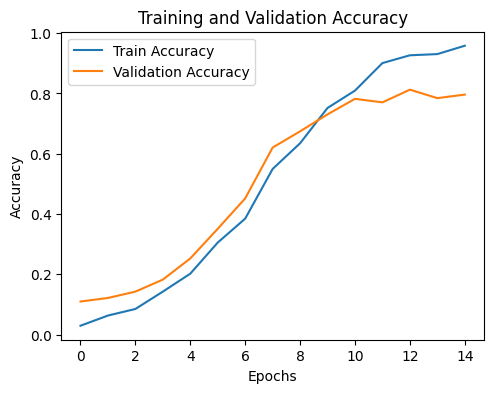

In [10]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

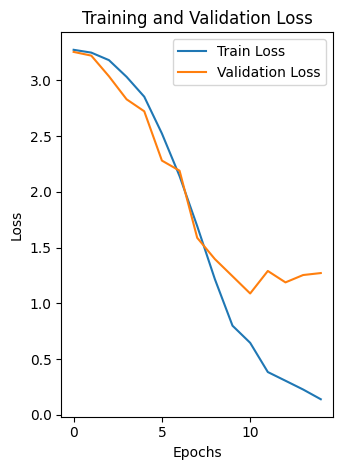

In [11]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy * 100:.2f}%')

# Save the model
model.save('hand_gesture_model.h5')


14/14 [==============================] - 1s 83ms/step - loss: 1.2719 - accuracy: 0.7963
Test accuracy: 79.63%


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


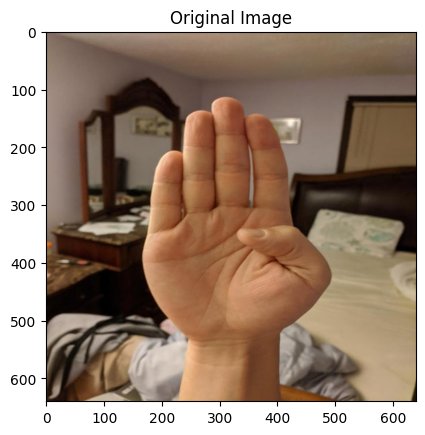

1/1 [==============================] - 0s 35ms/step
The predicted class for the provided image is: B


In [15]:
def predict_image(image_path, model, label_binarizer):
    image = load_img(image_path, target_size=(64, 64))
    image = img_to_array(image) / 255.0
    image = np.expand_dims(image, axis=0)

    prediction = model.predict(image)
    predicted_class = label_binarizer.inverse_transform(prediction)

    return predicted_class[0]

image_path = os.path.join(base_dir, 'test/B15_jpg.rf.e387e3bf7be4e92129693e754f858c85.jpg')
image = load_image(image_path)
plt.imshow(image)
plt.title("Original Image")
plt.show()

predicted_class = predict_image(image_path, model, label_binarizer)
print(f'The predicted class for the provided image is: {predicted_class}')


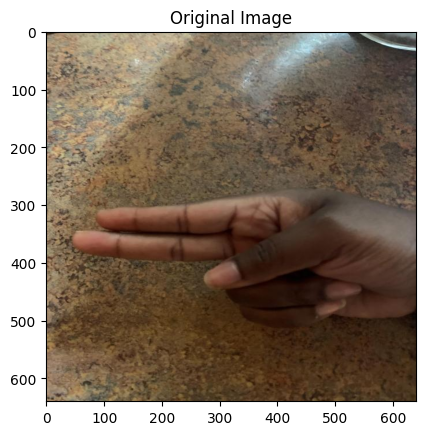

1/1 [==============================] - 0s 60ms/step
The predicted class for the provided image is: H


In [14]:
def predict_image(image_path, model, label_binarizer):
    image = load_img(image_path, target_size=(64, 64))
    image = img_to_array(image) / 255.0
    image = np.expand_dims(image, axis=0)

    prediction = model.predict(image)
    predicted_class = label_binarizer.inverse_transform(prediction)

    return predicted_class[0]

image_path = os.path.join(base_dir, 'test/H19_jpg.rf.19219d4e4b7d29e99379ca5c004b5fdf.jpg')
image = load_image(image_path)
plt.imshow(image)
plt.title("Original Image")
plt.show()

predicted_class = predict_image(image_path, model, label_binarizer)
print(f'The predicted class for the provided image is: {predicted_class}')
